# Table des matières

[Importation des données énergie](#import_data_energie) <br>
[Importation des données météo](#import_data_meteo) <br>
[Représentation des séries temporelles](#rep_serie_temp) <br>


[Mission 1](#mission1) <br>

[Mission 2](#mission2) <br>

[Mission 3](#mission3) <br>




In [1]:
library('gdata')
library('plyr')
library('tibble')
library('tidyr')
library('dplyr')
library('reshape')
library('forecast')
library('imputeTS')
library('caschrono')

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:gdata’:

    combine, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths

The following objects are masked from ‘package:

<a id='import_data_energie'></a>

# Importation données energie

In [2]:
df_energie <- as.data.frame(read.xls('../fichiers_csv/energie.xls'))
colnames(df_energie)
df_energie$Mois <- as.vector(df_energie$Mois)
df_energie$Qualite <- as.vector(df_energie$Qualite)
df_energie$Territoire <- as.vector(df_energie$Territoire)

str(df_energie)


[1] "Mois"                                    
 [2] "Qualite"                                 
 [3] "Territoire"                              
 [4] "Production.totale"                       
 [5] "Production.nucleaire"                    
 [6] "Production.thermique.totale"             
 [7] "Production.thermique.charbon"            
 [8] "Production.thermique.fioul"              
 [9] "Production.thermique.gaz"                
[10] "Production.hydraulique"                  
[11] "Production.eolien"                       
[12] "Production.solaire"                      
[13] "Production.bio.energies"                 
[14] "Consommation.totale"                     
[15] "Solde.exportateur"                       
[16] "Echanges.export"                         
[17] "Echanges.import"                         
[18] "Echanges.avec.le.Royaume.uni"            
[19] "Echanges.avec.l.Espagne"                 
[20] "Echanges.avec.l.Italie"                  
[21] "Echanges.aves.la.Suisse"                 
[22] "Echanges.avec.l.Allemagne.et.la.Belgique"

'data.frame':	855 obs. of  22 variables:
 $ Mois                                    : chr  "2010-01" "2010-02" "2010-03" "2010-04" ...
 $ Qualite                                 : chr  "Donnees consolidees" "Donnees consolidees" "Donnees consolidees" "Donnees consolidees" ...
 $ Territoire                              : chr  "France" "France" "France" "France" ...
 $ Production.totale                       : int  56542 50406 51071 41693 39847 40217 41064 39499 39218 42116 ...
 $ Production.nucleaire                    : int  40313 36316 35984 31294 29372 29575 31744 32391 31657 31885 ...
 $ Production.thermique.totale             : int  8801 6822 7250 3568 2843 2366 2953 1580 2965 4713 ...
 $ Production.thermique.charbon            : int  2928 1893 1994 1489 1097 681 1056 249 1226 1831 ...
 $ Production.thermique.fioul              : int  1690 1175 1275 612 504 463 511 424 502 896 ...
 $ Production.thermique.gaz                : int  4184 3754 3981 1467 1242 1223 1386 907 1236 1986 ...

In [3]:
df_energie <- df_energie %>% 
  select(Mois, Territoire, Consommation.totale) %>%
  filter(Territoire == "France")

In [4]:
mois = rep(c('JAN','FEV','MAR','AVR','MAI','JUIN','JUIL','AOUT','SEP','OCT','NOV','DEC'),8)
annee = c(rep('2010',12),rep('2011',12),rep('2012',12),rep('2013',12),rep('2014',12),rep('2015',12),rep('2016',12),rep('2017',12))

In [5]:
df_energie <- df_energie[1:96,]
df_energie <- cbind.data.frame(df_energie,mois,annee)
df_energie$mois <- as.vector(df_energie$mois)
df_energie$annee <- as.vector(df_energie$annee)


In [6]:
df_energie <- df_energie[,c("annee", "mois", "Consommation.totale", "Mois","Territoire")]

In [7]:
df_energie <- cast(df_energie,annee ~ mois,value='Consommation.totale',sum)
df_energie <- df_energie[,c("annee", 'JAN','FEV','MAR','AVR','MAI','JUIN','JUIL','AOUT','SEP','OCT','NOV','DEC')]

In [8]:
df_energie <- df_energie[1:7,]

In [9]:
df_energie

annee,JAN,FEV,MAR,AVR,MAI,JUIN,JUIL,AOUT,SEP,OCT,NOV,DEC
2010,56342,48698,48294,38637,37284,34567,36031,33069,35104,40918,46532,57600
2011,53873,45937,45543,35442,35107,33771,34204,32625,34230,37977,41837,48241
2012,51086,54476,43156,40176,35257,33219,34141,32247,33269,38628,44260,49602
2013,53619,49639,49480,40292,36821,32973,34751,31591,33195,37063,45310,50108
2014,49359,44580,43104,36331,34695,32608,33935,31004,33266,36301,40617,49350
2015,52536,48676,45739,36898,33927,33256,34912,31603,33521,39170,41085,44727
2016,50161,46440,47270,39102,34746,32852,33718,32132,33245,38590,44293,50670


<a id='import_data_meteo'></a>

# Importation données météo

Le Degré Jour Unifié est une valeur représentative de l’écart entre la température moyenne d’une journée et un seuil de température. Ce seuil est généralement fixé à 18°C. On parle alors de DJU base 18. Ainsi, pour une exploitation de chauffage, on s’intéressera aux DJU déficitaires, calculés à partir de températures inférieures à la base fixée.

Plus le nombre de DJU est élevé, plus le climat a été froid sur la période considérée.
On observe sur le graphique en haut que l’hiver 2013/2014 a été l’hiver le plus doux depuis 2007. Inversement, l’hiver 2012/2013 a été le plus rigoureux.

http://www.gpso-energie.fr/conseils/analyser-ses-consommations-dju

In [10]:
files_to_read <- list.files(path = '../fichiers_csv/meteo_data',full.names = TRUE)


In [11]:

liste_meteo <- lapply(files_to_read,function(i){
    list_csv <- read.xls(i)

    
})

In [12]:
df_meteo <- lapply(liste_meteo,function(i){
    a <- data.frame(i,stringsAsFactors = FALSE)

station <- as.vector(a[1,'X.1'])

mat <- as.matrix(a)
mat <- mat[-c(1,2,3,4,5,6,7),]
colnames(mat) <- mat[1,]
mat <- mat[-1,]
colnames(mat)[1] <- 'Annee'
nb_row <- length(mat[,'Annee'])
mat<- cbind(rep(station,nb_row),mat)
colnames(mat)[1] <- 'Station'
as.data.frame(mat,stringsAsFactors = FALSE)
mat[1:7,] #Valeur manquantes en 2017
})

In [13]:
df_base_meteo <- ldply(df_meteo, rbind)
df_base_meteo <- rename(df_base_meteo,c('Station' = 'station','Annee'='annee','JAN'='JAN','F\xc9V'='FEV','MAR'='MAR','AVR'='AVR','MAI'='MAI','JUN'='JUN','JUI'='JUI','AO\xdb'='AOU','SEP'='SEP','OCT'='OCT','NOV'='NOV','D\xc9C'='DEC','Total'='total'))


In [14]:
df_base_meteo[] <- as.vector(unlist(df_base_meteo, use.names = FALSE))
df_base_meteo[-2] <- as.numeric(unlist(df_base_meteo[-2], use.names = FALSE))

Warning message in eval(expr, envir, enclos):
“NAs introduits lors de la conversion automatique”

In [15]:
df_base_meteo <- ddply(df_base_meteo,~annee,summarise, JAN = mean(JAN),
      FEV = mean(FEV),
      MAR = mean(MAR),
      AVR = mean(AVR),
MAI = mean(MAI),
JUN = mean(JUN),
JUI = mean(JUI),
AOU = mean(AOU),
SEP = mean(SEP),
OCT = mean(OCT),
NOV = mean(NOV),
DEC = mean(DEC))


In [16]:
df_base_meteo

annee,JAN,FEV,MAR,AVR,MAI,JUN,JUI,AOU,SEP,OCT,NOV,DEC
2010,484.9267,369.9756,317.2278,189.6422,154.08889,40.69889,5.656667,22.85444,75.07222,184.95667,303.3189,478.8556
2011,406.2789,313.8867,273.3411,121.5056,70.45333,46.10111,32.323333,19.43889,32.31667,136.76111,220.3189,326.8511
2012,373.1278,478.2522,245.1367,237.8778,103.84111,41.35444,24.552222,8.21000,67.81889,152.04111,282.9667,363.1200
2013,429.6233,413.0800,353.4844,231.2144,186.51889,61.25778,5.921111,13.47556,53.80667,112.49667,321.7444,379.1200
2014,341.1244,302.5311,274.3767,171.0933,130.10000,30.49000,15.743333,32.52667,35.64222,96.57444,221.9400,384.3467
2015,406.9656,387.6867,296.7800,180.4811,107.18111,27.36556,11.420000,13.06667,85.59333,189.47000,223.8689,279.3678
2016,361.8989,329.3178,334.9833,229.5767,121.88111,39.40111,14.776667,11.26111,28.29556,190.01556,292.3822,401.0267


<a id='rep_serie_temp'></a>

# Série temporelles

## Conso d'energie

In [17]:
df_energie_ts <- ts(as.vector(as.matrix(df_energie[-1])),start=c(2010,1),frequency = 12)
log_df_energie_ts = log(df_energie_ts)

In [18]:
#dev.copy(png,'../presentation/images/ts_energie.png')
png(filename='../presentation/images/ts_energie.png')
plot(df_energie_ts,ylab='Conso mensuelle',main="Série temporelle de la consommation d'électricité")
dev.off()

png 
  2

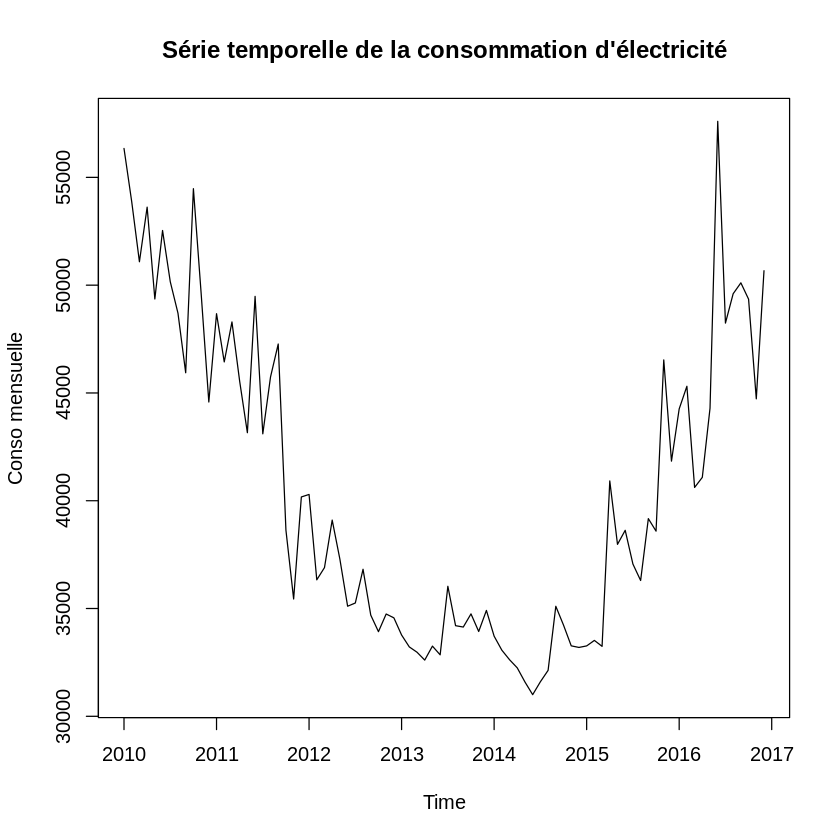

In [19]:
plot(df_energie_ts,ylab='Conso mensuelle',main="Série temporelle de la consommation d'électricité")

# Effet meteo dju

In [20]:
df_base_meteo_ts <- ts(as.vector(as.matrix(df_base_meteo[-1])),start=c(2010,1),frequency = 12)
log_df_base_meteo_ts = log(df_base_meteo_ts)

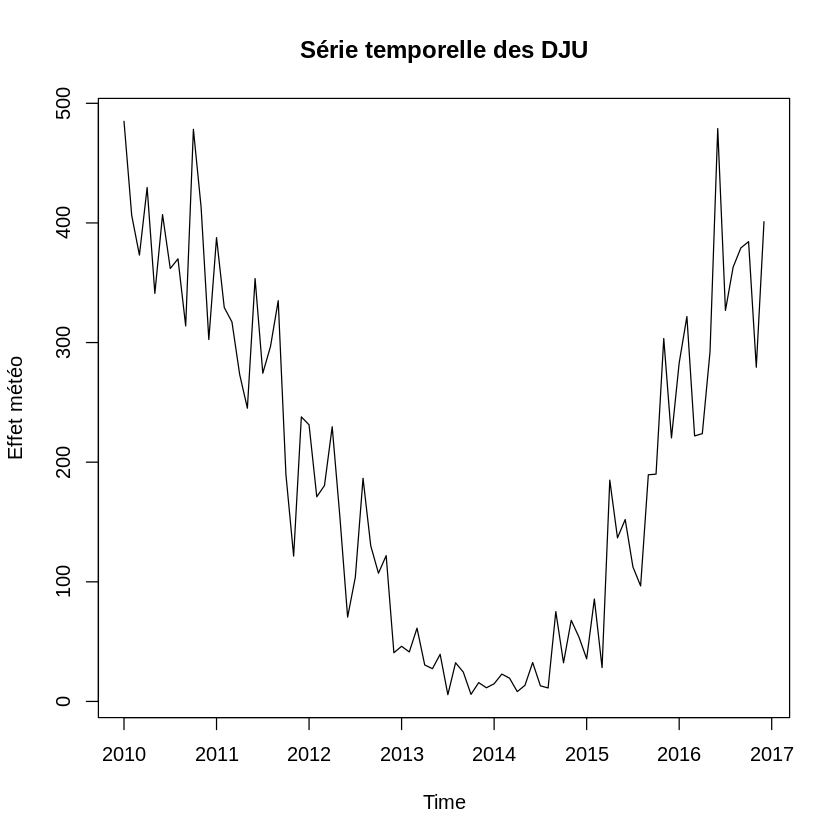

In [21]:
plot(df_base_meteo_ts,ylab='Effet météo',main='Série temporelle des DJU')

In [22]:
png(filename='../presentation/images/ts_meteo.png')
plot(df_base_meteo_ts,ylab='Effet météo',main='Série temporelle des DJU')
dev.off()

png 
  2

<a id='mission1'></a>

# Mission 1 : Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

Comment pondérer les consommations en fonction du climat ?

La correction climatique consiste à pondérer les consommations de chauffage sur la base des données climatiques annuelles de la station météo. L’objectif est de rendre les années comparables entre elle, quelle qu’ait été la rudesse de l’hiver. En ramenant les consommations de chauffage à un climat de référence, caractérisé par les DJU, on supprime ainsi les variations imputables à la rigueur climatique.

Consommations corrigées = consommations x (DJU de référence/DJU de la période de consommation considérée)

http://www.gpso-energie.fr/conseils/analyser-ses-consommations-dju

## On effectue la régression linéaire (le modèle a été transformé afin de palier au problème de colinéarité) sur la série Yt

In [23]:
## Note : Colinéarité = En algèbre linéaire, deux vecteurs u et v d'un espace vectoriel E sont colinéaires s'il existe un scalaire k tel que u = kv ou v = ku. 
reg=lm(log_df_energie_ts~log_df_base_meteo_ts)
summary(reg)

## Affichage des coefficients
reg$coefficients

## Coefficients initiaux
a=reg$coefficients




Call:
lm(formula = log_df_energie_ts ~ log_df_base_meteo_ts)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.153079 -0.072196 -0.003129  0.067329  0.260510 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          10.023935   0.041358  242.37   <2e-16 ***
log_df_base_meteo_ts  0.119856   0.008432   14.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09386 on 82 degrees of freedom
Multiple R-squared:  0.7113,	Adjusted R-squared:  0.7078 
F-statistic:   202 on 1 and 82 DF,  p-value: < 2.2e-16


(Intercept) log_df_base_meteo_ts 
          10.0239347            0.1198559

cem = Correction Effet météo

In [24]:
log_df_energie_ts

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2010 10.93920 10.89438 10.84127 10.88966 10.80688 10.86925 10.82299 10.79339
2011 10.79294 10.74592 10.78506 10.72641 10.67258 10.80932 10.67137 10.73071
2012 10.60391 10.50043 10.51591 10.57393 10.52632 10.46616 10.47042 10.51382
2013 10.42736 10.41088 10.40344 10.39231 10.41199 10.39977 10.49213 10.44010
2014 10.42579 10.40635 10.39283 10.38118 10.36063 10.34187 10.36101 10.37761
2015 10.41229 10.41993 10.41166 10.61933 10.54474 10.56173 10.52037 10.49960
2016 10.69784 10.72128 10.61194 10.62340 10.69858 10.96128 10.78396 10.81179
          Sep      Oct      Nov      Dec
2010 10.73503 10.90552 10.81253 10.70504
2011 10.76363 10.56197 10.47565 10.60103
2012 10.45435 10.43197 10.45582 10.45065
2013 10.43825 10.45596 10.43220 10.46059
2014 10.46607 10.44086 10.41238 10.41015
2015 10.57567 10.56075 10.74790 10.64154
2016 10.82194 10.80669 10.70833 10.83309

In [25]:
a[2]

log_df_base_meteo_ts 
           0.1198559

In [26]:
log_df_energie_ts_cem=log_df_energie_ts-a[2]
log_df_energie_ts_cem

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2010 10.81934 10.77453 10.72141 10.76980 10.68702 10.74940 10.70314 10.67354
2011 10.67309 10.62606 10.66521 10.60656 10.55272 10.68947 10.55152 10.61085
2012 10.48405 10.38057 10.39606 10.45407 10.40646 10.34630 10.35056 10.39397
2013 10.30750 10.29102 10.28359 10.27246 10.29213 10.27991 10.37228 10.32024
2014 10.30593 10.28650 10.27298 10.26132 10.24077 10.22202 10.24115 10.25775
2015 10.29244 10.30007 10.29180 10.49947 10.42488 10.44188 10.40052 10.37974
2016 10.57798 10.60143 10.49209 10.50354 10.57873 10.84142 10.66411 10.69193
          Sep      Oct      Nov      Dec
2010 10.61517 10.78566 10.69268 10.58518
2011 10.64378 10.44211 10.35580 10.48117
2012 10.33449 10.31211 10.33596 10.33080
2013 10.31840 10.33611 10.31235 10.34073
2014 10.34621 10.32100 10.29253 10.29030
2015 10.45581 10.44089 10.62804 10.52168
2016 10.70208 10.68684 10.58848 10.71323

## On calcule la série corrigée de l'effet météo (en n'oubliant pas de passer à l'exponentiel pour revenir à Xt)

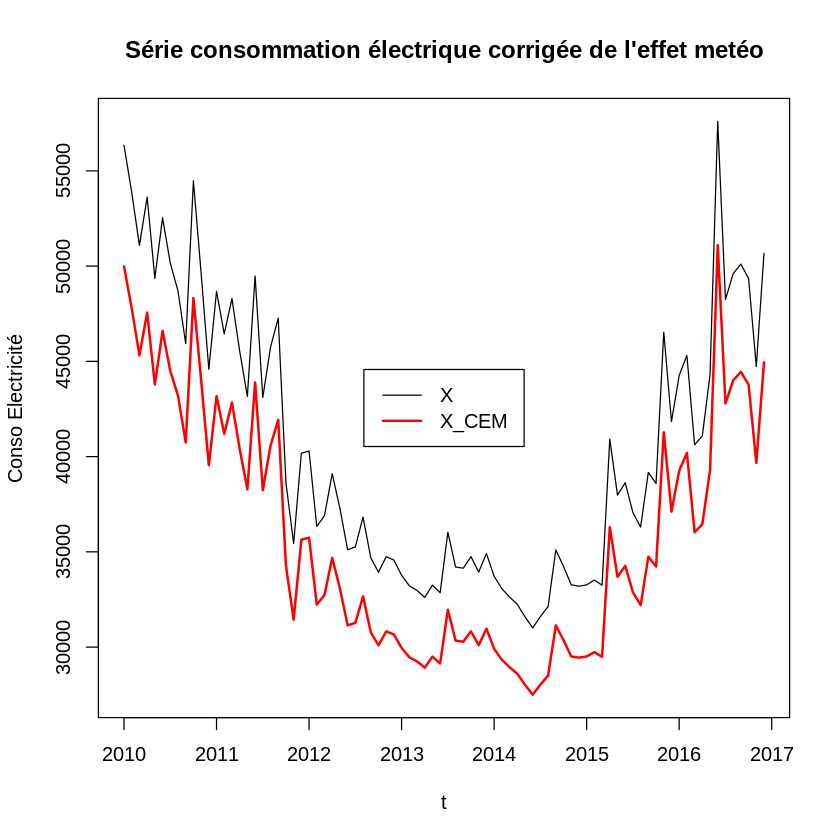

In [27]:
log_df_energie_ts_cem=log_df_energie_ts-a[2]


df_energie_ts_cem=exp(log_df_energie_ts_cem)

ts.plot(df_energie_ts,df_energie_ts_cem,xlab='t',ylab='Conso Electricité',col=c(1,2),lwd=c(1,2),main = "Série consommation électrique corrigée de l'effet metéo")
legend('center',legend=c("X","X_CEM"),col=c(1,2),lwd=c(1,2))

In [28]:
png(filename='../presentation/images/ts_energie_cem.png')
ts.plot(df_energie_ts,df_energie_ts_cem,xlab='t',ylab='Conso Electricité',col=c(1,2),lwd=c(1,2),main = "Série consommation électrique corrigée de l'effet metéo")
legend('center',legend=c("X","X_CEM"),col=c(1,2),lwd=c(1,2))
dev.off()

png 
  2

<a id='mission2'></a>

# Mission 2 : Effectuez une désaisonnalisation de la consommation que vous aurez obtenue après correction, grâce aux moyennes mobiles.

## Désaisonnaliser une série temporelle à l'aide des moyennes mobile (alogrithme x11)
Il y a deux phases de 4 étapes. Chaque phase donne une St corrigée.


### Etape 1 : Primo-estimation de la tendance


In [29]:

m2_12=function(x){
  y=(1/12)*stats::filter(x,c(0.5,rep(1,times=11),0.5))
  return(y)
}
t1=m2_12(log_df_energie_ts_cem)

### Etape 2 : Primo-estimation de la somme composante saisonnière-perturbation


In [30]:
sig1=log_df_energie_ts_cem-t1



###  Etape 3 : Primo-estimation de la composante saisonnière


In [31]:
m3=function(x){
  
  y=(1/3)*stats::filter(x,rep(1,times=3))
  
  return(y)
  
}
s1=m3(m3(sig1))
shat1=s1-m2_12(s1)


### Etape 4 :  Primo-estimation de la série corrigée des variations saisonnières


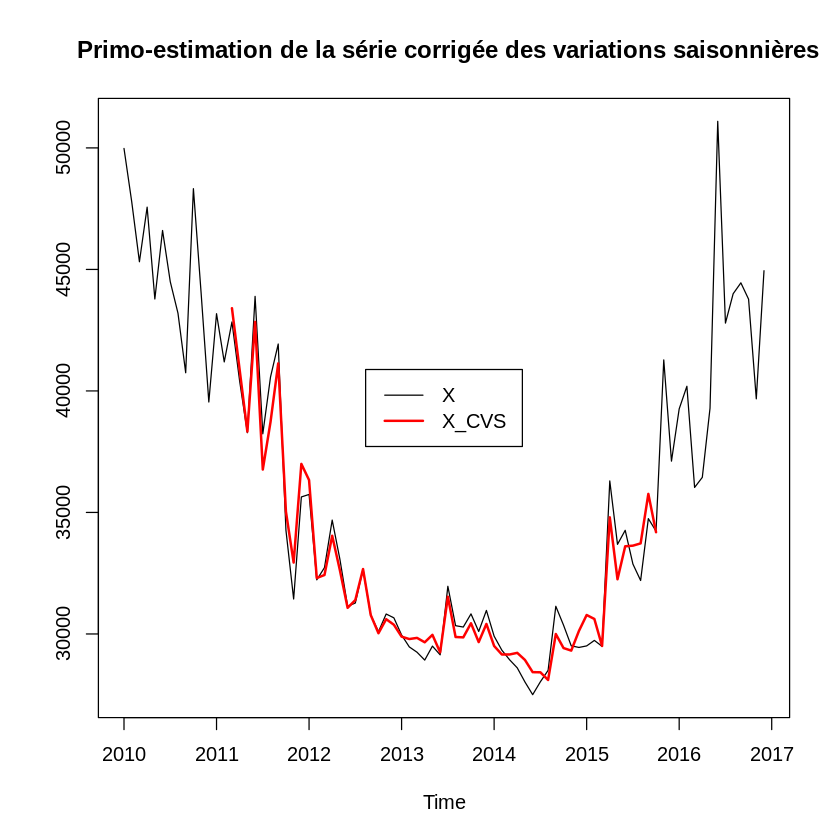

In [32]:
log_df_energie_ts_cem_cvs1=log_df_energie_ts_cem-shat1
df_energie_ts_cem_cvs1=exp(log_df_energie_ts_cem_cvs1)

ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs1,col=c(1,2),lwd=c(1,2),main=" Primo-estimation de la série corrigée des variations saisonnières")

legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))


In [33]:
png(filename='../presentation/images/phase1_desaison.png')
ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs1,col=c(1,2),lwd=c(1,2),main=" Primo-estimation de la série corrigée des variations saisonnières")
legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))
dev.off()

png 
  2

## Fin de la phase 1 et debut de la phase 2

### Etape 1 : Estimation définitive de la tendance

In [34]:
m13h=function(x){
  
  y=(1/16796)*stats::filter(x,c(-325,-468,0,1100,2475,3600,4032,3600,2475,1100,0,-468,-325))
  
  return(y)
  
}
t2=m13h(df_energie_ts_cem_cvs1)

### Etape 2 : Estimation définitive de la somme composante saisonnière-perturbation (2)

In [35]:
sig2=log_df_energie_ts_cem-t2

### Etape 3 : Estimation définitive de la composante saisonnière

In [36]:
m5=function(x){
  y=(1/5)*stats::filter(x,rep(1,times=5))
  return(y)
}
s2=m3(m5(sig2))
shat2=s2-m2_12(s2)

### Estimation définitive de la série corrigée des variations saisonnières

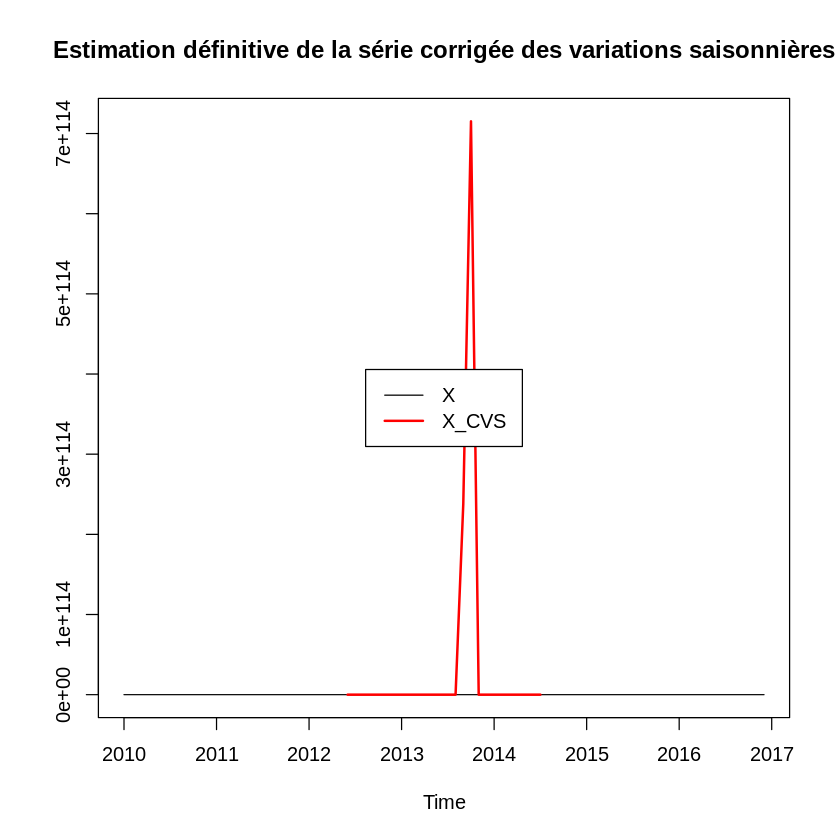

In [37]:
log_df_energie_ts_cem_cvs2=log_df_energie_ts_cem-shat2
df_energie_ts_cem_cvs2=exp(log_df_energie_ts_cem_cvs2)

ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs2,col=c(1,2),lwd=c(1,2),main="Estimation définitive de la série corrigée des variations saisonnières")

legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))

<a id='mission3'></a>

# Mission 3 : Effectuez une prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel) puis la méthode ARMA sur la série temporelle désaisonnalisée.

## Prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel) 

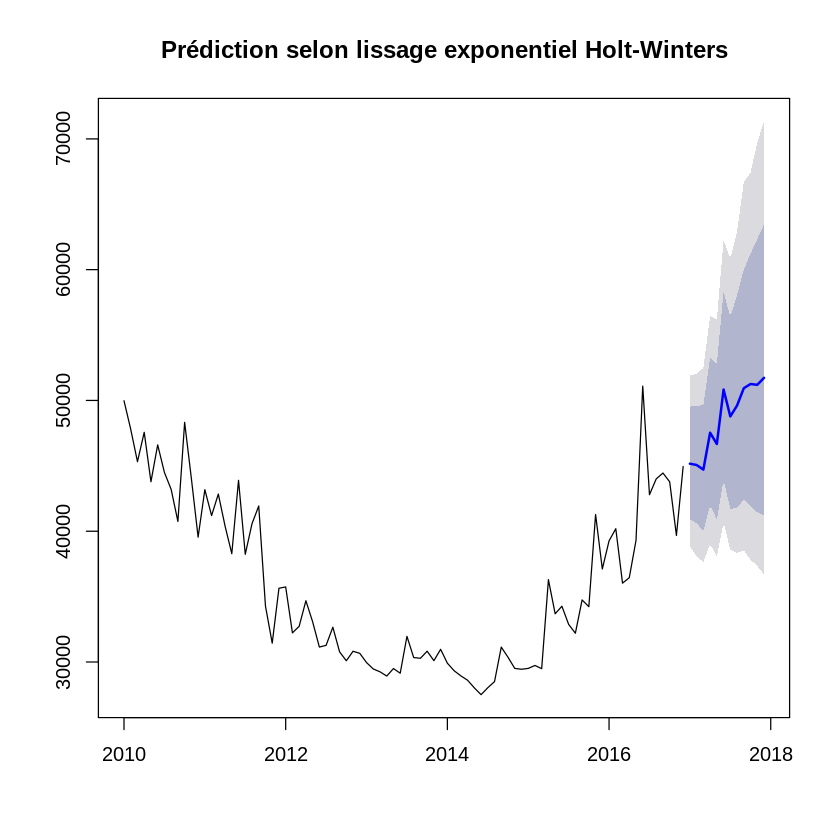

In [38]:
# Lissage holt-winters :
hw=ets(df_energie_ts_cem,model="MMM")
hw.pred=predict(hw,12)
plot(hw.pred,main='Prédiction selon lissage exponentiel Holt-Winters')

In [39]:
png(filename='../presentation/images/lissage_expo.png')
plot(hw.pred,main='Prédiction selon lissage exponentiel Holt-Winters')
dev.off()

png 
  2

## Prédiction avec la méthode ARMA sur la série temporelle désaisonnalisée.

Seuil = 5% <br/>
On désigne par Xt  la série conso électricité corrigée de l'effet météo, et on considère Yt=ln(Xt) <br/>
On a besoin de travailler sur le logarithme de la série afin de pallier l’accroissement de la saisonnalité. <br/>
On passe ainsi d’un modèle multiplicatif à un modèle additif.

## Processus stationnaire ou non ? 

En statistiques, on aime bien avoir des valeurs indépendantes -- or les séries temporelles ont des valeurs naturellement corrélées. Pour observer les corrélation on utilise une courbe d'autocorrélation (ACF)
Il y a trois observations possibles : 
    - l'ACF qui est presque nulle correspond à des données non corrélées (processus stationnaire) 
    - l'ACF tantôt positive, tantôt négative à des données pérriodiques 
    - Décroissance lente de la courbe ACF (processus non stationnaire)
    

Pour les modèles AR, MA, et ARMA le corrélogramme simple (représenté par la courbe ACF) décroit rapidement vers 0. A l'inverse si ça décroit lentement vers 0 ça ne peut pas correspondre à un processus stationnaire. (ARIMA, SARIMA)

Si la sortie ACF présente une décroissance rapide vers 0 (Les autocorrélations simples décroissent rapidement vers 0 (de manière exponentielle ou sinusoïdale amortie) le processus est donc stationnaire. 
---> Exit (ARIMA, SARIMA) <br/>
Rappel :  Un processus est dit stationnaire si la structure du processus sous-jacent supposé évolue ou non avec le temps. Si la structure reste la même, le processus est dit alors stationnaire. 

Pour info : Si la courbe ACF décroit lentement vers 0, on appliquera obligatoirement un opérateur de différentiation d'ordre 1 (I-B soit Xt-Xt-1) plusieurs fois jusqu'à avoir des pic d'autocorréllation identifiables. Il faut identifier l'ordre de ces pics, par exemple des pics d'ordre 12, et appliquer un opérateur de différentiation d'ordre 12 pour enfin obtenir un processus stationnaire. (CF Exemple ARIMA et SARIMA OpenClassrooms)

Pour les processus AR(p), les autocorrélations convergent vers 0 à vitesse géométrique alors que les autocorrélations partielles sont nulles à partir du rang p+1. Pour un jeu de données, les autocorrélations partielles empirique permettent donc d’avoir une idée des valeurs possibles pour p.

Pour les processus MA(q), les autocorrélations partielles convergent vers 0 à vitesse géométrique alors que les autocorrélations sont nulles à partir du rang q + 1. Les autocorrélations empiriques permettent d’avoir une idée des valeurs possibles pour q.

Transformations such as logarithms can help to stabilize the variance of a time series. Differencing can help stabilize the mean of a time series by removing changes in the level of a time series, and so eliminating trend and seasonality.

In [40]:
df_energie_ts_cem_cvs1 <- na.remove(df_energie_ts_cem_cvs1)

In [41]:
x = df_energie_ts_cem_cvs1
y = log(x) # On stabilise la variance


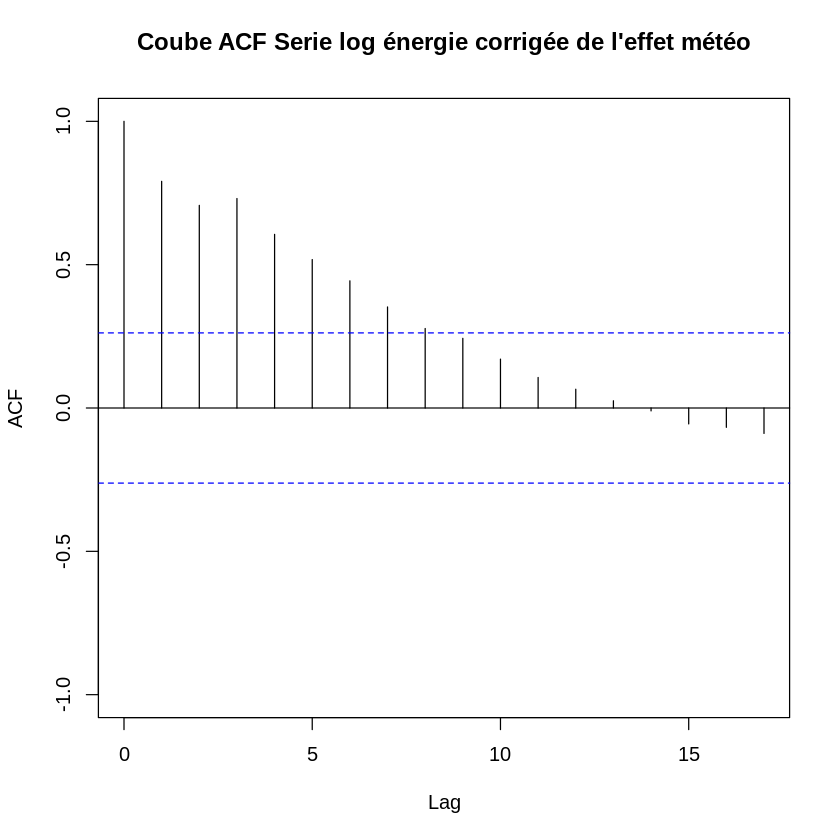

In [42]:
acf = acf(y,plot=FALSE)
#acf$lag = acf$lag*12

plot(acf,ylim=c(-1,1),main="Coube ACF Serie log énergie corrigée de l'effet météo")



Le processus n'est pas stationnaire. Nous allons réaliser une différentiation d'ordre 1.

In [43]:
png(filename='../presentation/images/courbe_acf_1.png')
plot(acf,ylim=c(-1,1),main="Coube ACF Serie log énergie corrigée de l'effet météo (y)")
dev.off()

png 
  2

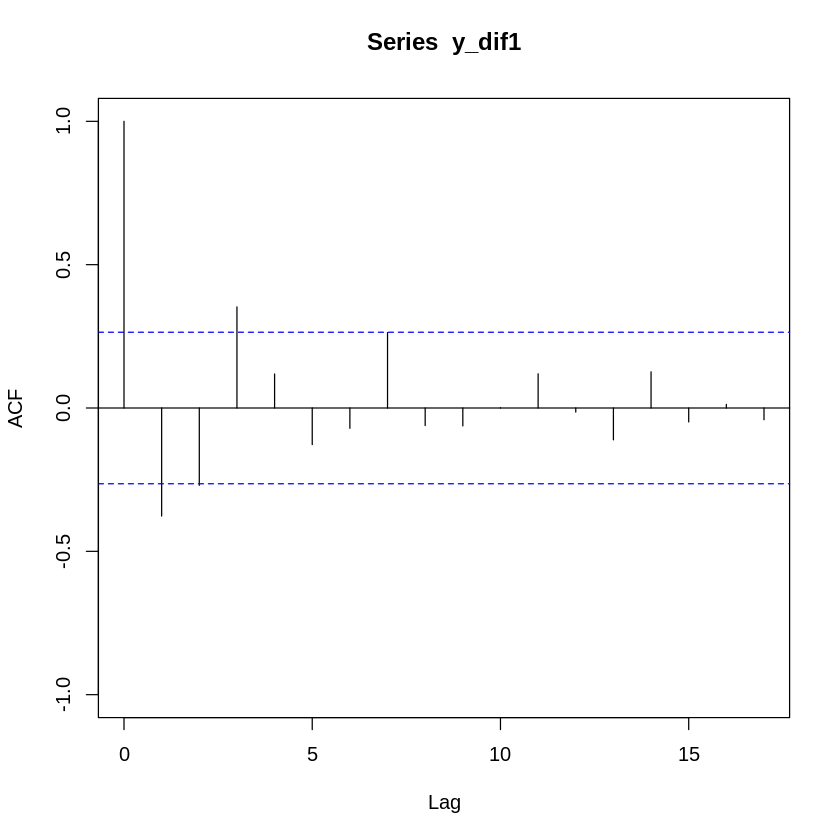

In [44]:
y_dif1=diff(y,lag=1,differences = 1)
plot(acf(y_dif1,plot=FALSE),ylim=c(-1,1))

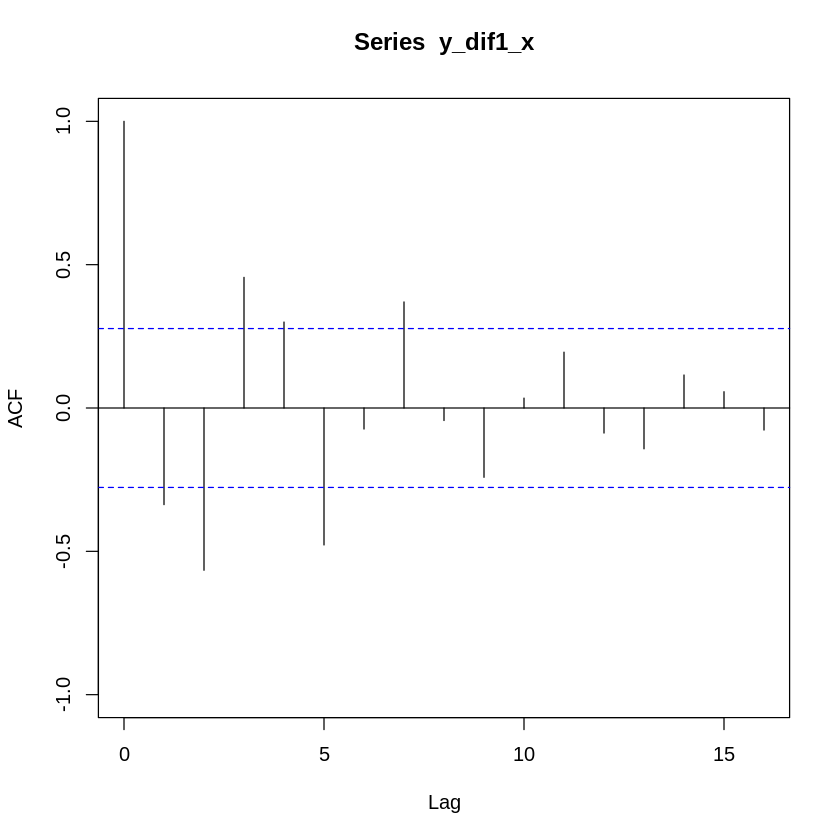

In [48]:
y_dif1_x=diff(y_dif1,lag=5,differences = 1)
plot(acf(y_dif1_x,plot=FALSE),ylim=c(-1,1))